## folium basic

### data preparation

In [1]:
# library load
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# data load
store = pd.read_csv('data/store_201906_01.csv')
store.shape

(565016, 39)

In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     565016 non-null  int64  
 1   상호명        565015 non-null  object 
 2   지점명        75524 non-null   object 
 3   상권업종대분류코드  565016 non-null  object 
 4   상권업종대분류명   565016 non-null  object 
 5   상권업종중분류코드  565016 non-null  object 
 6   상권업종중분류명   565016 non-null  object 
 7   상권업종소분류코드  565016 non-null  object 
 8   상권업종소분류명   565016 non-null  object 
 9   표준산업분류코드   532064 non-null  object 
 10  표준산업분류명    532064 non-null  object 
 11  시도코드       565016 non-null  int64  
 12  시도명        565016 non-null  object 
 13  시군구코드      565016 non-null  int64  
 14  시군구명       565016 non-null  object 
 15  행정동코드      565016 non-null  int64  
 16  행정동명       565016 non-null  object 
 17  법정동코드      565016 non-null  int64  
 18  법정동명       565016 non-null  object 
 19  지번코드       565016 non-n

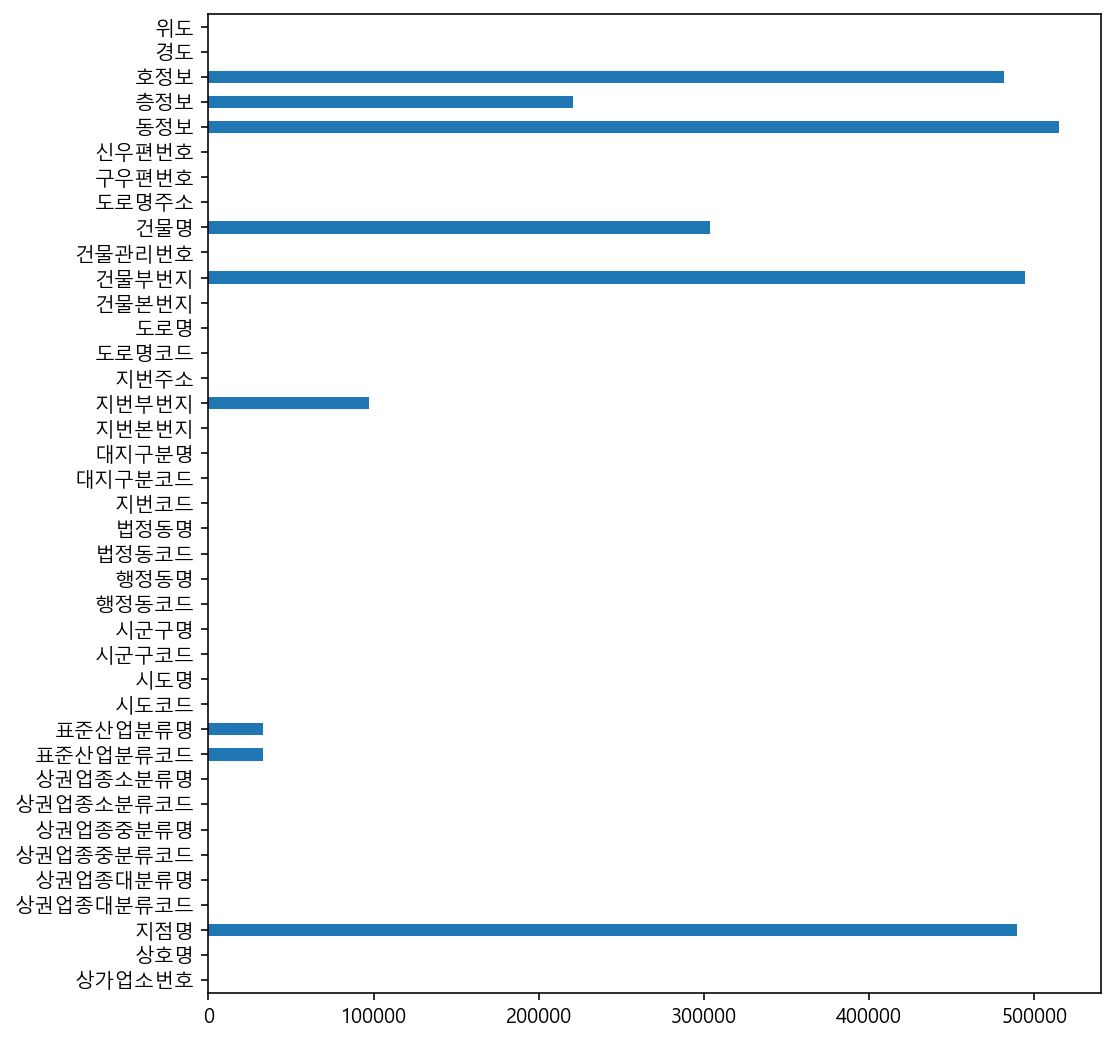

In [5]:
# null value
store.isnull().sum().plot.barh(figsize=(8, 9))

In [6]:
# columns to delete
null_cols = store.isnull().sum().sort_values(ascending=False).head(9)

drop_cols = null_cols.index.to_list()
drop_cols

['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명', '표준산업분류코드']

In [7]:
print(store.shape)

store = store.drop(drop_cols, axis=1)
print(store.shape)

(565016, 39)
(565016, 30)


In [8]:
# memory saved
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     565016 non-null  int64  
 1   상호명        565015 non-null  object 
 2   상권업종대분류코드  565016 non-null  object 
 3   상권업종대분류명   565016 non-null  object 
 4   상권업종중분류코드  565016 non-null  object 
 5   상권업종중분류명   565016 non-null  object 
 6   상권업종소분류코드  565016 non-null  object 
 7   상권업종소분류명   565016 non-null  object 
 8   시도코드       565016 non-null  int64  
 9   시도명        565016 non-null  object 
 10  시군구코드      565016 non-null  int64  
 11  시군구명       565016 non-null  object 
 12  행정동코드      565016 non-null  int64  
 13  행정동명       565016 non-null  object 
 14  법정동코드      565016 non-null  int64  
 15  법정동명       565016 non-null  object 
 16  지번코드       565016 non-null  int64  
 17  대지구분코드     565016 non-null  int64  
 18  대지구분명      565016 non-null  object 
 19  지번본번지      565016 non-n

In [9]:
store['상권업종대분류명'].value_counts()

음식          183715
소매          177590
생활서비스        94104
학문/교육        42139
의료           25255
부동산          20460
관광/여가/오락     16283
숙박            5240
스포츠            230
Name: 상권업종대분류명, dtype: int64

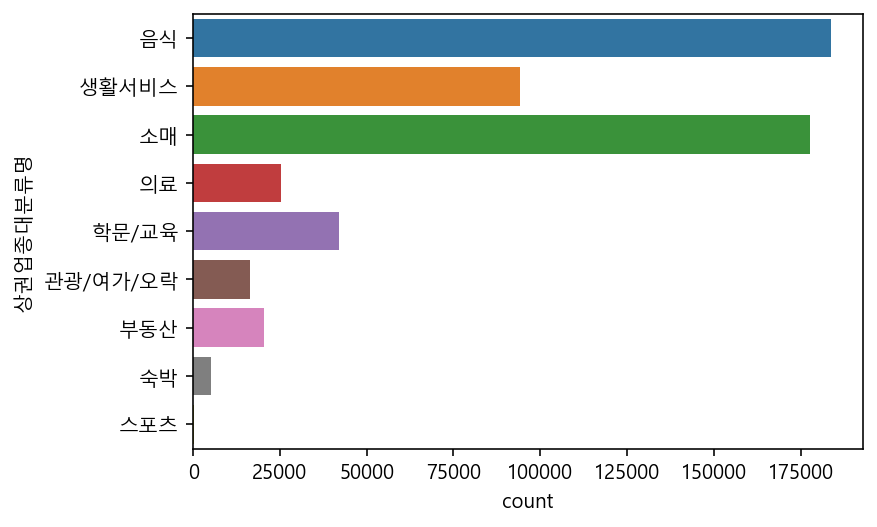

In [10]:
sns.countplot(data=store, y='상권업종대분류명')

In [11]:
store.loc[store['상권업종대분류명'] == '숙박', '상권업종소분류명'].value_counts()

모텔/여관/여인숙    3929
호텔/콘도         979
민박/하숙         195
캠프/별장/펜션      119
유스호스텔          18
Name: 상권업종소분류명, dtype: int64

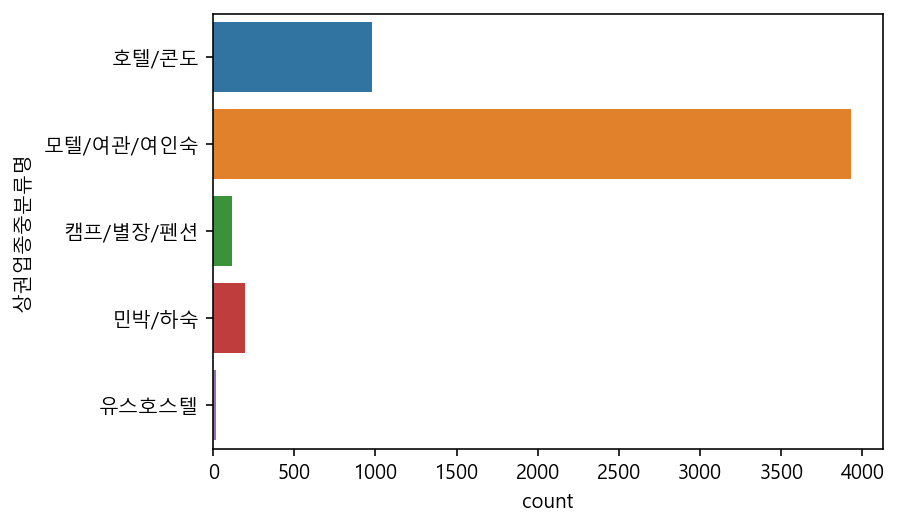

In [12]:
hp = store[store['상권업종대분류명'] == '숙박']
sns.countplot(data=hp, y='상권업종중분류명')

In [13]:
store.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [14]:
# selective columns
cols = ['상가업소번호', '상호명', '상권업종대분류명', '상권업종중분류명', 
        '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명',
        '행정동명', '법정동명', '지번코드', '대지구분명', '지번본번지', '지번주소',
        '도로명주소', '구우편번호', '신우편번호', '경도', '위도',
       ]
df = store[cols].copy()
df.shape

(565016, 20)

In [15]:
motel = df[df['상권업종소분류명'].str.contains('모텔')]
motel.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동명,법정동명,지번코드,대지구분명,지번본번지,지번주소,도로명주소,구우편번호,신우편번호,경도,위도
731,23044133,옥수장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11200,성동구,성수2가3동,성수동2가,1120011500202990152,대지,299,서울특별시 성동구 성수동2가 299-152,서울특별시 성동구 성수일로12길 15-1,133120,4792.0,127.053063,37.548625
736,23155563,신라장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,26,부산광역시,26530,사상구,괘법동,괘법동,2653010400202730023,대지,273,부산광역시 사상구 괘법동 273-23,부산광역시 사상구 사상로224번길 20,617806,46964.0,128.984451,35.165285
757,23150939,세피앙,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11110,종로구,종로1.2.3.4가동,익선동,1111013300200800000,대지,80,서울특별시 종로구 익선동 80,서울특별시 종로구 돈화문로11가길 49,110340,3132.0,126.990445,37.574777
759,23139638,나이스,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11500,강서구,화곡1동,화곡동,1150010300209380008,대지,938,서울특별시 강서구 화곡동 938-8,서울특별시 강서구 월정로20길 15,157010,7775.0,126.839490,37.529752
762,23053488,남산장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11170,용산구,한남동,한남동,1117013100206830138,대지,683,서울특별시 용산구 한남동 683-138,서울특별시 용산구 이태원로 256,140892,4400.0,127.001258,37.537358


In [16]:
motel['상호명'].unique()

array(['옥수장', '신라장', '세피앙', ..., '그레이빌', '에어호스텔명동', '행운장'], dtype=object)

In [17]:
motel['상호명'].nunique()

2985

In [18]:
# 브라운도트, 야자, 얌
motel[motel['상호명'].str.contains('도트|야자|얌')]

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동명,법정동명,지번코드,대지구분명,지번본번지,지번주소,도로명주소,구우편번호,신우편번호,경도,위도
8854,23152363,야자모텔,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11200,성동구,왕십리도선동,도선동,1120010400201000000,대지,100,서울특별시 성동구 도선동 100,서울특별시 성동구 왕십리로22길 20,133882,4709.0,127.035136,37.563635
28186,23034942,야자모텔,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11230,동대문구,제기동,제기동,1123010300211420003,대지,1142,서울특별시 동대문구 제기동 1142-3,서울특별시 동대문구 회기로 34,130865,2468.0,127.040240,37.591078
28399,23107289,모텔얌천호점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11740,강동구,천호2동,천호동,1174010900203570011,대지,357,서울특별시 강동구 천호동 357-11,서울특별시 강동구 올림픽로 680,134020,5327.0,127.124879,37.542016
307420,23052268,모텔얌,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11560,영등포구,영등포동,영등포동6가,1156010700200490002,대지,49,서울특별시 영등포구 영등포동6가 49-2,서울특별시 영등포구 영등포로35길 17-4,150036,7251.0,126.904108,37.521774
314245,22858220,호텔야자,숙박,모텔/여관/여인숙,모텔/여관/여인숙,26,부산광역시,26410,금정구,구서1동,구서동,2641010700200850012,대지,85,부산광역시 금정구 구서동 85-12,부산광역시 금정구 금정로237번길 28,609310,46273.0,129.091718,35.247447
375666,23373128,모텔얌서래마을점서래마을점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11650,서초구,반포4동,반포동,1165010700200940007,대지,94,서울특별시 서초구 반포동 94-7,서울특별시 서초구 서래로 43,137040,6576.0,126.998197,37.498894
396557,11769692,호텔야자강서구청점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11500,강서구,화곡본동,화곡동,1150010300200240060,대지,24,서울특별시 강서구 화곡동 24-60,서울특별시 강서구 화곡로 248-8,157010,7678.0,126.846372,37.547192
407922,11956552,호텔야자,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11110,종로구,종로1.2.3.4가동,낙원동,1111013700200860000,대지,86,서울특별시 종로구 낙원동 86,서울특별시 종로구 수표로28길 9-1,110320,3133.0,126.988906,37.573079
409206,11989932,호텔야자ANNE연신내역점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11380,은평구,대조동,대조동,1138010600201860052,대지,186,서울특별시 은평구 대조동 186-52,서울특별시 은평구 연서로28길 17,122842,3385.0,126.921668,37.617382
409668,12051596,모텔얌상봉역점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11260,중랑구,상봉2동,상봉동,1126010200200890008,대지,89,서울특별시 중랑구 상봉동 89-8,서울특별시 중랑구 망우로50길 29,131220,2149.0,127.089393,37.595900


In [19]:
motel.loc[motel['상호명'].str.contains('도트|야자|얌'), '상호명'].unique()

array(['야자모텔', '모텔얌천호점', '모텔얌', '호텔야자', '모텔얌서래마을점서래마을점', '호텔야자강서구청점',
       '호텔야자ANNE연신내역점', '모텔얌상봉역점', '모텔얌고려대점', '브라운도트양정점', '브라운도트', '호텔얌',
       '얌호텔', '호텔야자고대점', '얌모텔고려대점', '호텔야자사당역점', '얌모텔', '야자', '브라운도트호텔',
       '야자호텔'], dtype=object)

In [20]:
df_m = motel[motel['상호명'].str.contains('도트|야자|얌')].copy()
df_m.head(1)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동명,법정동명,지번코드,대지구분명,지번본번지,지번주소,도로명주소,구우편번호,신우편번호,경도,위도
8854,23152363,야자모텔,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11200,성동구,왕십리도선동,도선동,1120010400201000000,대지,100,서울특별시 성동구 도선동 100,서울특별시 성동구 왕십리로22길 20,133882,4709.0,127.035136,37.563635


In [21]:
df_m.loc[df_m['상호명'].str.contains('도트'), '브랜드명'] = '브라운도트'
df_m.loc[df_m['상호명'].str.contains('야자'), '브랜드명'] = '호텔야자'
df_m.loc[df_m['상호명'].str.contains('얌'), '브랜드명'] = '호텔얌'
# or
# df_m['브랜드명'].fillna('호텔얌')

df_m[['상호명', '브랜드명']]

,상호명,브랜드명
8854,야자모텔,호텔야자
28186,야자모텔,호텔야자
28399,모텔얌천호점,호텔얌
307420,모텔얌,호텔얌
314245,호텔야자,호텔야자
375666,모텔얌서래마을점서래마을점,호텔얌
396557,호텔야자강서구청점,호텔야자
407922,호텔야자,호텔야자
409206,호텔야자ANNE연신내역점,호텔야자
409668,모텔얌상봉역점,호텔얌


In [22]:
df_m['브랜드명'].value_counts()

호텔야자     14
호텔얌      12
브라운도트     6
Name: 브랜드명, dtype: int64

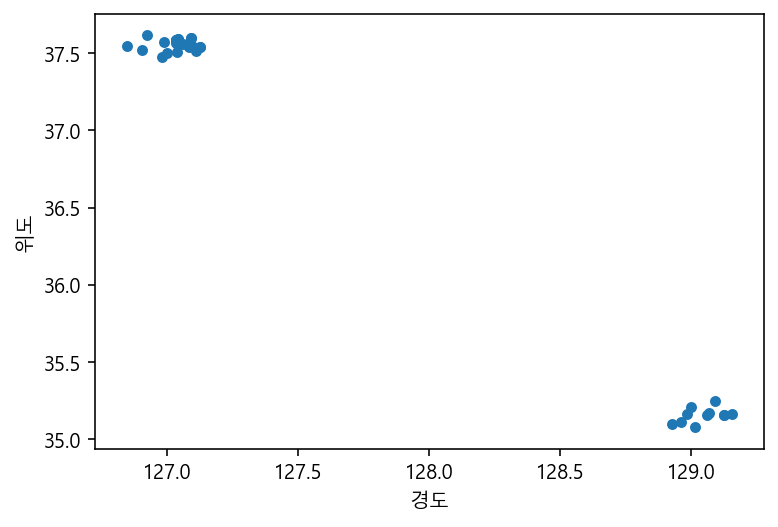

In [23]:
df_m[['위도', '경도']].plot.scatter(x='경도', y='위도')

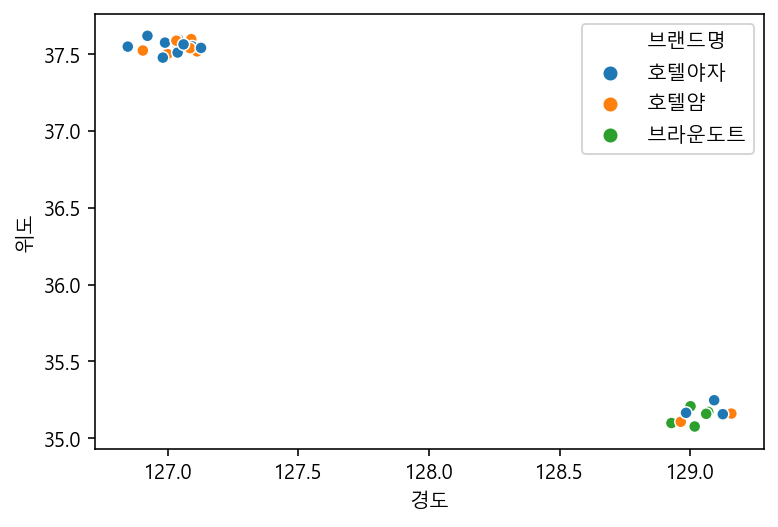

In [24]:
sns.scatterplot(data=df_m, x='경도', y='위도', hue='브랜드명')

In [25]:
# group by
group = df_m.groupby(['시군구명', '브랜드명'])['상호명'].count().reset_index()
group.head()

,시군구명,브랜드명,상호명
0,강남구,호텔야자,1
1,강동구,호텔야자,1
2,강동구,호텔얌,1
3,강서구,브라운도트,1
4,강서구,호텔야자,1


In [26]:
group.columns = ['구', '브랜드명', '매장수']
group.head()

,구,브랜드명,매장수
0,강남구,호텔야자,1
1,강동구,호텔야자,1
2,강동구,호텔얌,1
3,강서구,브라운도트,1
4,강서구,호텔야자,1


In [27]:
# or by pivot_table
pd.pivot_table(data=df_m, index=['시군구명', '브랜드명'], values='상호명', aggfunc='count').head()

상호명
시군구명 브랜드명      
강남구  호텔야자     1
강동구  호텔야자     1
     호텔얌      1
강서구  브라운도트    1
     호텔야자     1

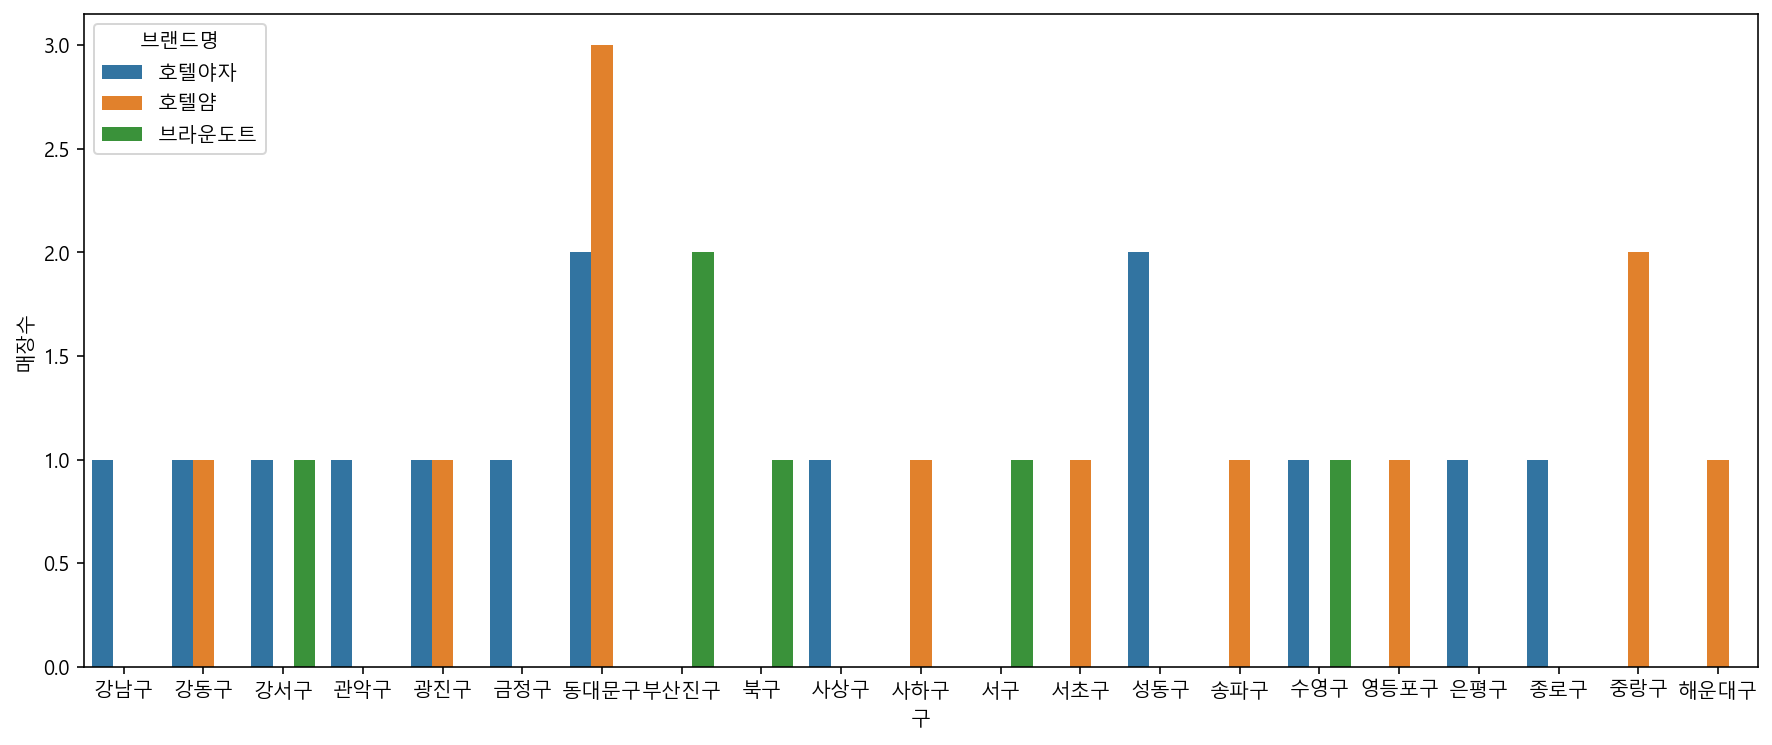

In [50]:
plt.figure(figsize=(15, 6))
# plt.xticks(rotation=45)
sns.barplot(data=group, x='구', y='매장수', hue='브랜드명')

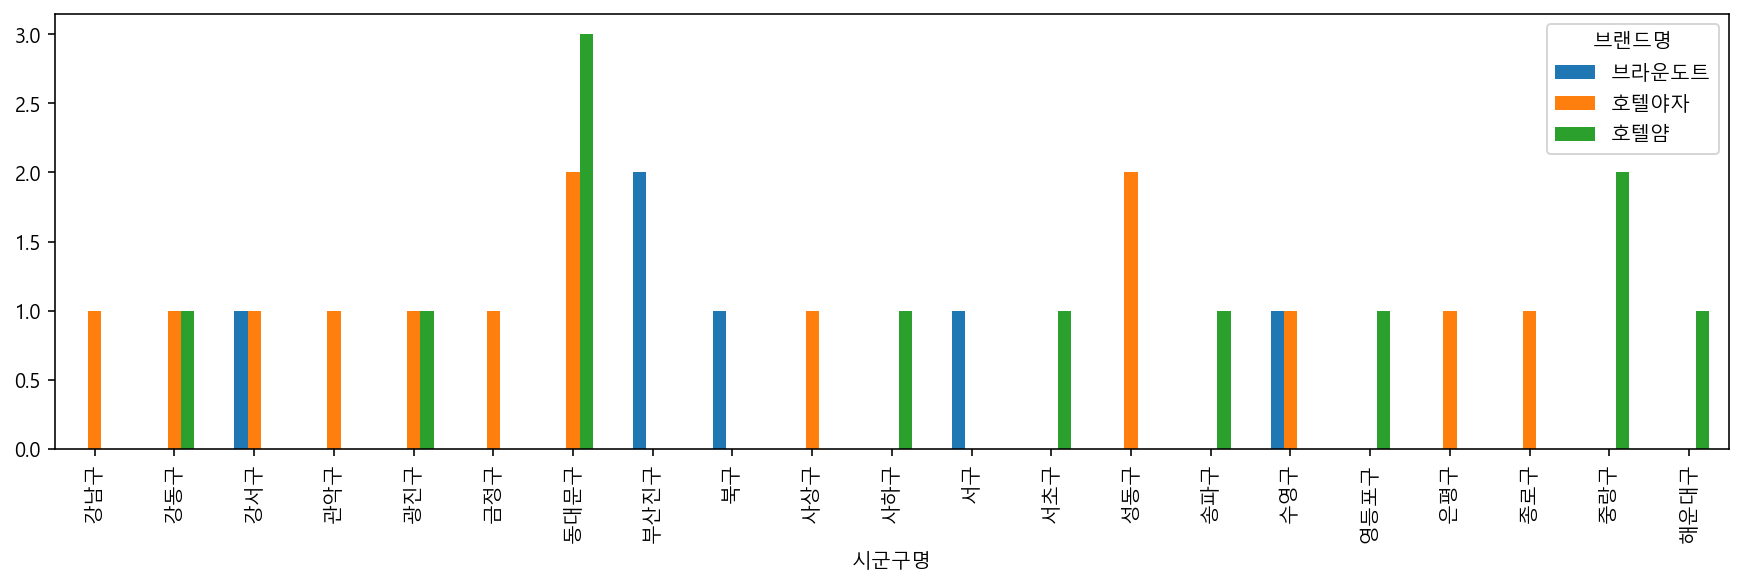

In [52]:
# or
df_m.groupby(['시군구명', '브랜드명'])['상호명'].count().unstack().plot.bar(figsize=(15, 4))

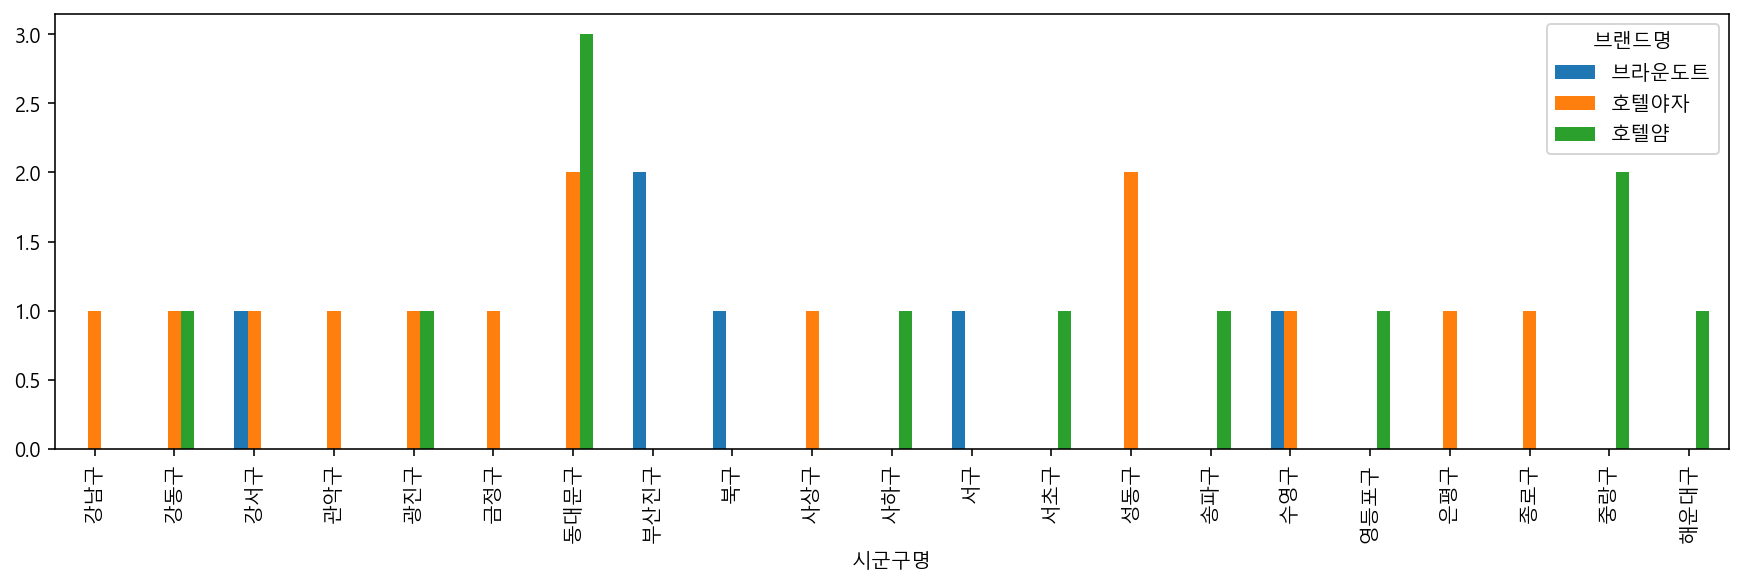

In [54]:
# or
pd.pivot_table(data=df_m, index='시군구명', columns='브랜드명', values='상호명', aggfunc='count').plot.bar(figsize=(15, 4))

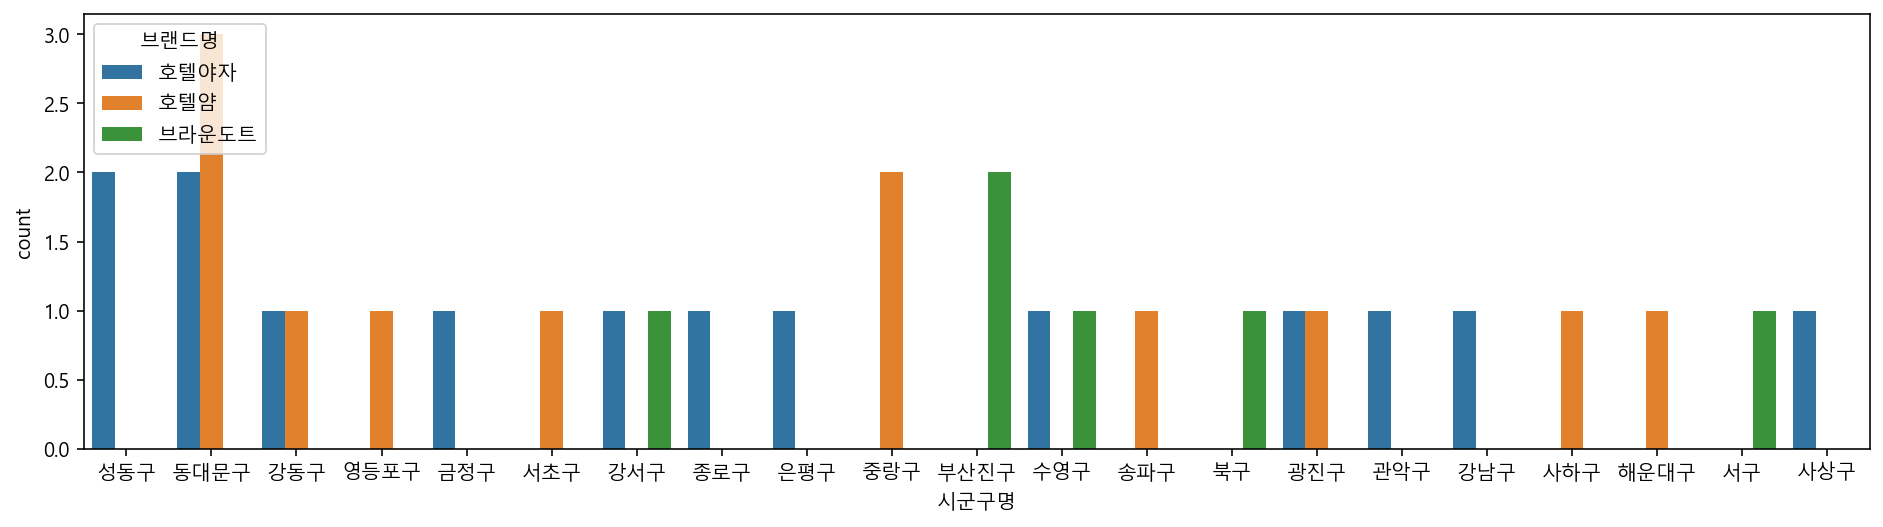

In [56]:
# or
plt.figure(figsize=(16, 4))
sns.countplot(data=df_m, x='시군구명', hue='브랜드명')

### map visualization by folium

In [30]:
import folium

In [31]:
lat = df_m['위도'].mean()
long = df_m['경도'].mean()
lat, long

(36.73088022222984, 127.72477669577712)

In [44]:
map = folium.Map(location=[lat, long], zoom_start=7)

folium.Marker([37.534303, 126.994781], 
              tooltip='서울특별시 용산구 이태원동 127-6').add_to(map)
map

In [45]:
map.save('marker.html')

#### in seoul only

In [33]:
df_m['시도명'].value_counts()

서울특별시    21
부산광역시    11
Name: 시도명, dtype: int64

In [34]:
m_seoul = df_m[df_m['시도명'] == '서울특별시'].copy()
m_seoul

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동명,...,지번코드,대지구분명,지번본번지,지번주소,도로명주소,구우편번호,신우편번호,경도,위도,브랜드명
8854,23152363,야자모텔,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11200,성동구,왕십리도선동,...,1120010400201000000,대지,100,서울특별시 성동구 도선동 100,서울특별시 성동구 왕십리로22길 20,133882,4709.0,127.035136,37.563635,호텔야자
28186,23034942,야자모텔,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11230,동대문구,제기동,...,1123010300211420003,대지,1142,서울특별시 동대문구 제기동 1142-3,서울특별시 동대문구 회기로 34,130865,2468.0,127.040240,37.591078,호텔야자
28399,23107289,모텔얌천호점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11740,강동구,천호2동,...,1174010900203570011,대지,357,서울특별시 강동구 천호동 357-11,서울특별시 강동구 올림픽로 680,134020,5327.0,127.124879,37.542016,호텔얌
307420,23052268,모텔얌,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11560,영등포구,영등포동,...,1156010700200490002,대지,49,서울특별시 영등포구 영등포동6가 49-2,서울특별시 영등포구 영등포로35길 17-4,150036,7251.0,126.904108,37.521774,호텔얌
375666,23373128,모텔얌서래마을점서래마을점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11650,서초구,반포4동,...,1165010700200940007,대지,94,서울특별시 서초구 반포동 94-7,서울특별시 서초구 서래로 43,137040,6576.0,126.998197,37.498894,호텔얌
396557,11769692,호텔야자강서구청점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11500,강서구,화곡본동,...,1150010300200240060,대지,24,서울특별시 강서구 화곡동 24-60,서울특별시 강서구 화곡로 248-8,157010,7678.0,126.846372,37.547192,호텔야자
407922,11956552,호텔야자,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11110,종로구,종로1.2.3.4가동,...,1111013700200860000,대지,86,서울특별시 종로구 낙원동 86,서울특별시 종로구 수표로28길 9-1,110320,3133.0,126.988906,37.573079,호텔야자
409206,11989932,호텔야자ANNE연신내역점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11380,은평구,대조동,...,1138010600201860052,대지,186,서울특별시 은평구 대조동 186-52,서울특별시 은평구 연서로28길 17,122842,3385.0,126.921668,37.617382,호텔야자
409668,12051596,모텔얌상봉역점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11260,중랑구,상봉2동,...,1126010200200890008,대지,89,서울특별시 중랑구 상봉동 89-8,서울특별시 중랑구 망우로50길 29,131220,2149.0,127.089393,37.595900,호텔얌
410376,12051505,모텔얌고려대점,숙박,모텔/여관/여인숙,모텔/여관/여인숙,11,서울특별시,11230,동대문구,제기동,...,1123010300200670209,대지,67,서울특별시 동대문구 제기동 67-209,서울특별시 동대문구 안암로 116-1,130860,2474.0,127.032429,37.585671,호텔얌


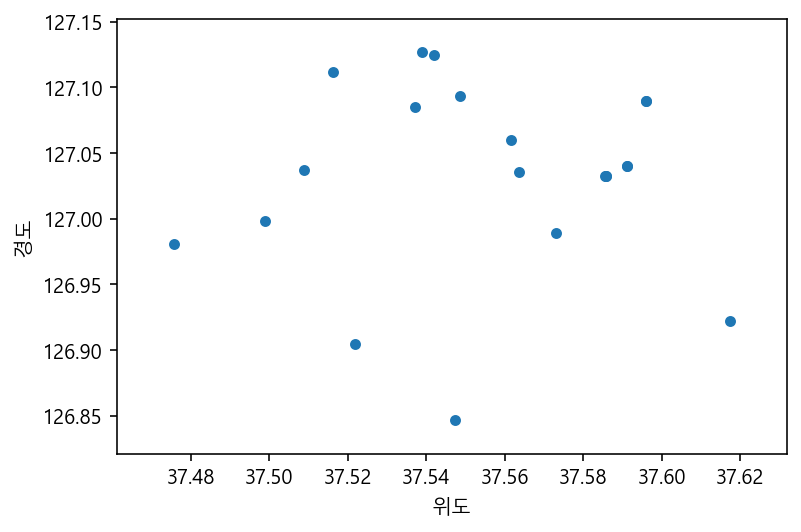

In [35]:
m_seoul[['위도', '경도']].plot.scatter(x='위도', y='경도')

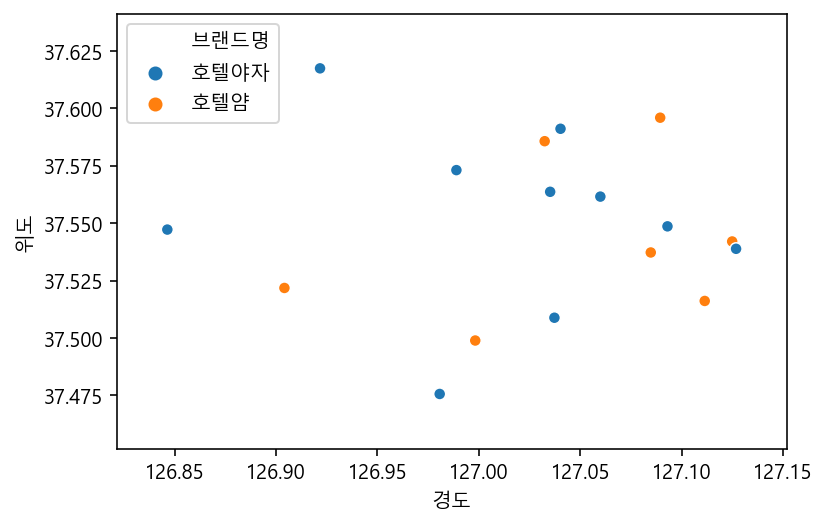

In [36]:
sns.scatterplot(data=m_seoul, x='경도', y='위도', hue='브랜드명')

In [46]:
lat = m_seoul['위도'].mean()
long = m_seoul['경도'].mean()
lat, long

(37.55626451223672, 127.03187826664228)

In [47]:
# circle marker
map02 = folium.Map(location=[lat, long], zoom_start=11)

folium.CircleMarker([37.534303, 126.994781], 
              tooltip='서울특별시 용산구 이태원동 127-6').add_to(map02)
map02

In [48]:
map02.save('circle.html')

In [51]:
m_seoul['브랜드명'].value_counts()

호텔야자    11
호텔얌     10
Name: 브랜드명, dtype: int64

In [54]:
map03 = folium.Map(location=[37.543, 126.989], zoom_start=11)

for n in m_seoul.index:
    tooltip = f"{m_seoul.loc[n, '상호명']} : {m_seoul.loc[n, '도로명주소']}"
    lat = m_seoul.loc[n, '위도']
    long = m_seoul.loc[n, '경도']
    icon_color = 'red'
    
    if m_seoul.loc[n, '브랜드명'] == '호텔얌':
        icon_color = 'blue'
    
    folium.CircleMarker([lat, long],
                       radius=5, 
                       color=icon_color,
                       tooltip=tooltip,
                       ).add_to(map03) #dd1c77
    
map03

In [55]:
map03.save('m_circle.html')

In [110]:
#### choropleth

In [111]:
# geo_path = 'data/seoul_municipalities_geo_simple.json'

# import json

# geo_json = json.load(open(geo_path, encoding='utf-8'))

# geo_json['features'][0]['properties']['name']

In [112]:
# s_group = m_seoul.groupby(['시군구명', '브랜드명'])['상호명'].count().reset_index()
# s_group.head(1)

In [113]:
# s_group.columns = ['구', '브랜드명', '매장수']

In [115]:
# yaja = s_group[s_group['브랜드명'] == '호텔야자'].copy()
# yaja.head(1)

In [116]:
# yam = s_group[s_group['브랜드명'] == '호텔얌'].copy()
# yam.head(1)

In [109]:
# map = folium.Map(location=[37.543, 126.989], zoom_start=10,
#                 control_scale=True)

# folium.Choropleth(
#     geo_data=geo_json,
#     name='choropleth',
#     data=yaja,
#     columns=['구', '매장수'],
#     key_on='feature.properties.name',
#     fill_color='RdPu',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='호텔야자 매장수',
#     reset=True
# ).add_to(map)
# folium.LayerControl().add_to(map)

# for n in m_seoul.index:
#     tooltip = f"{m_seoul.loc[n, '상호명']} : {m_seoul.loc[n, '도로명주소']}"
#     lat = m_seoul.loc[n, '위도']
#     long = m_seoul.loc[n, '경도']
#     icon_color = '#dd1c77'
    
#     if m_seoul.loc[n, '브랜드명'] == '호텔얌':
#         icon_color = 'blue'
    
#     folium.CircleMarker([lat, long],
#                        radius=5, 
#                        color=icon_color,
#                        tooltip=tooltip,
#                        ).add_to(map) 

# map

In [78]:
# map.save('choropleth-circle.html')